## Import packages

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

## Load data with xarray

In [2]:
fpath_tas = '/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/Amon/tas/gn/latest/'
ds = xr.open_mfdataset(fpath_tas+'*.nc',combine='by_coords')
fpath_cellarea = '/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/fx/areacella/gn/latest/'
ds_cellarea = xr.open_mfdataset(fpath_cellarea+'*.nc',combine='by_coords')

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'areacella' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)


Look at data

In [3]:
#ds

## Define function for making map

In [4]:
def make_map(mapdata, lat, lon, cmap=plt.cm.viridis, filepath=None, title=''):
    """ Creates map """
    
    # Set up map
    fig = plt.figure(figsize=(12, 9))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines(resolution='110m')
    ax.set_global()

    # Plot data
    cyclic_data, cyclic_lons = add_cyclic_point(mapdata, coord=lon)
    cs = plt.pcolormesh(cyclic_lons, lat, cyclic_data,
                        transform=ccrs.PlateCarree())
    
    # Make colorbar
    plt.set_cmap(cmap)
    cbar = plt.colorbar(ax=ax, orientation='horizontal',
                        extend='both', pad=.02, shrink=0.9)
    cbar.ax.tick_params(labelsize=14)
    
    # Add title
    plt.title(title, fontsize=16, y=1.05, loc='center')
    
    # Save figure
    if filepath:
        fig.savefig(filepath+'.png', dpi=300, facecolor=None, edgecolor=None,
                    bbox_inches='tight', transparent=True, pad_inches=0.2, linewidth=2)

## Make map
This dataset is average temperature

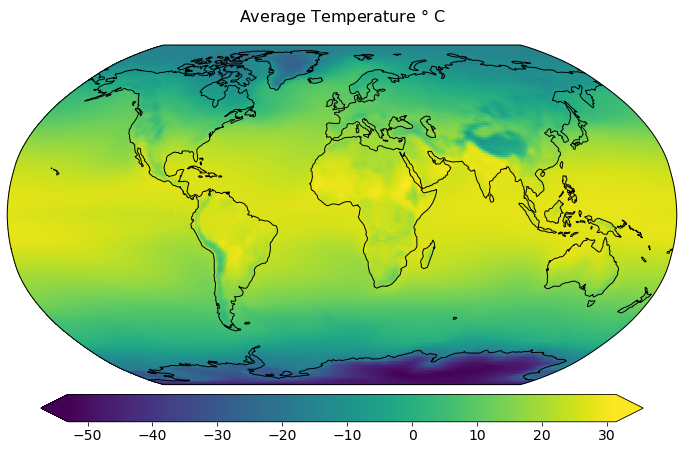

In [5]:
make_map(ds['tas'].mean(dim='time') - 273.15,
         ds['lat'], ds['lon'], 
         title='Average Temperature $\degree$ C')

## Plot timeseries

In [6]:
global_area = ds_cellarea['areacella'].sum(dim=['lat','lon']).load()
area_weights = ds_cellarea['areacella']/global_area
weighted_temp = ds['tas']*area_weights
global_avg_temp = weighted_temp.sum(dim=['lat','lon'])
global_avg_temp = global_avg_temp - 273.15
global_annual_avg_temp = global_avg_temp.groupby('time.year').mean().load()

Text(0, 0.5, 'Global Avg Temp ($\\degree$ C)')

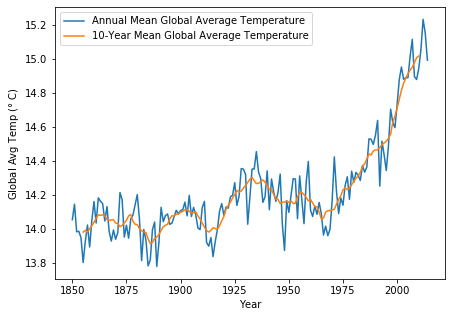

In [7]:
fig = plt.figure(figsize=(7, 5))
plt.plot(global_annual_avg_temp['year'], global_annual_avg_temp, 
         label='Annual Mean Global Average Temperature')
plt.plot(global_annual_avg_temp['year'], global_annual_avg_temp.rolling(year=10, center=True).mean(),
         label='10-Year Mean Global Average Temperature')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Global Avg Temp ($\degree$ C)')

## More about markdown

You can include additional information, e.g.:
* Equations
\begin{equation*}
E_{sun} = \rho_a  \: \frac{VPD  \: \epsilon}{p_a} \: g_{s, sun} LAI_{sun} \bigg(1+ \frac{g_{s, sun}}{g_{b}} \bigg)^{-1}
\end{equation*}

* Links to supporting documentation, like [this section](https://github.com/ESCOMP/CTSM/blob/master/src/biogeophys/PhotosynthesisMod.F90#L4807) of CESM code
* Blockquotes, e.g.
> This section is trying to implement this:
> >     cf       = forc_pbot(c)/(rgas * 1.e-3_r8 * tgcm(p)) * 1.e6
> >     wtl      = (elai(p)+esai(p)) * gb_mol

* Images like this ![](https://atmos.uw.edu/wp-content/themes/coenv-atmos/assets/video/video-bg-ss.jpg)